# Data Visualization
---

We have now seen how to handle and pre-process data, how create subsets based on filters, and also how to display statistics of the data. However, as the old adage goes, ***a picture is worth a thousand words***, and this is often applicable for data science. So let's have a look at how to create visualizations of our data.

To create plots, we need an additional package. `matplotlib` is without doubt the most well-known and widely-used Python package for visualizations. Unfortunately, it can also be somewhat unintuitive when first working with it. Because of this, we will gradually work our way to better plots, starting with very simple ones and eventually reaching a stage where we are able to plot anything we'd like.

We will also have a look at `seaborn`, which is a package built on top of `matplotlib` that is generally easier to use and that provides a high-level interface for drawing attractive statistical graphics. The price we pay for this ease of use is that we lose some control over the details of the plots.

In [1]:
# As always, we begin by importing our old friends
import numpy as np
import pandas as pd

# And we will also import matplotlib and seaborn, these are the standard aliases
import matplotlib.pyplot as plt
import seaborn as sns

Plotting packages are not always very easy to use. This is particularly true for `matplotlib` and there are a lot of layout options and at first it can feel overwhelming to replicate some of the nice plots you encounter. Creating fancy plots often takes more than just one or two lines of code. The [official cheatsheets and handouts](https://matplotlib.org/cheatsheets/) is very handy and will surely help you figuring out how to create beautiful plots.

In [2]:
# We first import the data we used last week, the iris dataset
df = pd.read_csv("data/iris.csv")

## Basic plots
___
The simplest way to plot data using `matplotlib` is to simply call a plotting function from the package directly. For instance, in just one line, we can make a [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot) of our iris flowers with the sepal length on the $x$-axis, and the petal length on the $y$-axis.

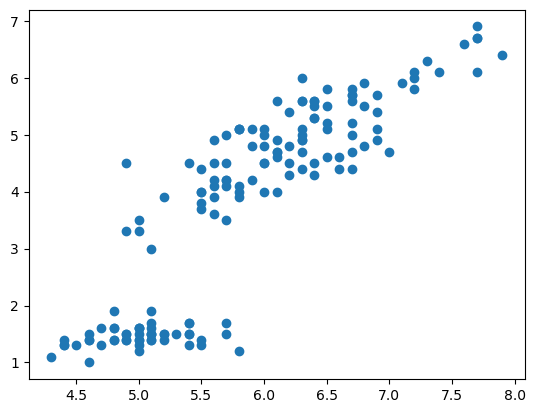

In [3]:
# The scatter() function takes as input the array of x-positions and the array of y-positions
plt.scatter(df["sepal length (cm)"], df["petal length (cm)"])

Another useful plot in data science is the [histogram](https://en.wikipedia.org/wiki/Histogram). A histogram gives us an approximative representation of the distribution of the data, and, as with the scatter plot, we can display it with a single line using matplotlib.

(array([ 4.,  7., 22., 24., 37., 31., 10., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

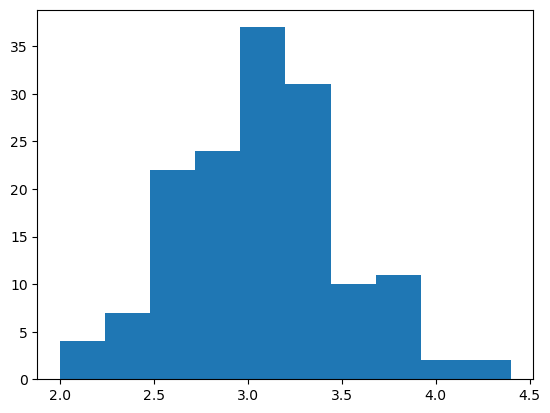

In [4]:
# Plot a histogram of the sepal width
plt.hist(df["sepal width (cm)"])

Without reading too much into the above plots, we see that there seems to be a relationship between sepal and petal length, where longer petals correlate with longer sepals. Furthermore, from the histogram, we see that most of our flowers have a sepal width around 3cm.

These are some very quick and easy plots. Useful to get a quick visual intuition of how some variables might look like and relate to one another but also somewhat limited with respect to the information displayed. Let's try to gradually integrate more information in our plots.

## Advanced plots
___
The above code works if we want some quick and dirty visualization of our data, but in most cases, we want to provide better illustrations, so it's good to get used to the somewhat more intricate logic that follows.

<img src="https://static.packt-cdn.com/products/9781788295260/graphics/751f256f-8d1f-4001-a0b7-a318659c07e4.png" alt="Figures and axes" width="600"/>

The above picture has a lot of information but don't be scared. We're going to go through it step by step to try and make it easier to digest. However, it might be helpful to come back to this picture to better understand how to think about some of the concepts we are now going to discuss.

### Figures and axes
In `matplotlib`, we generally have both an **axis** (or multiple **axes**), and a **figure**, which contains the axis. In a sense, the figure is your canvas, everything is displayed in it (the green rectangle in the picture above). The axis, on the other hand, only contains the graphical representation of the data (the blue rectanlge above). You can think of the figure as a container for your axes, as illustrated in the picture above.

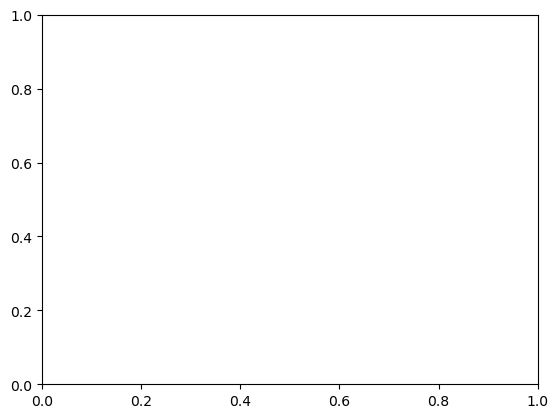

In [5]:
# Create a figure called fig and an axis called ax
fig, ax = plt.subplots()

Notice, above, how the plot is empty, while we did create the figure and the axis, we never added data, so let's try adding the scatter plot we did above.

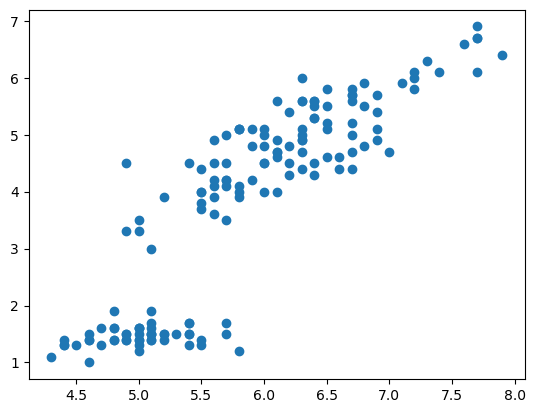

In [6]:
# Create a figure called fig and an axis called ax
fig, ax = plt.subplots()
# ⚠️ Notice how we use ax.scatter instead of plt.scatter! ⚠️
ax.scatter(df["sepal length (cm)"], df["petal length (cm)"])

Do you see the similarity with the scatter plot we did in the first part of the notebook? The only difference is that we used `ax.scatter(...)` instead of `plt.scatter(...)`.

#### 🙀 🤯 A note on good and bad practices when plotting
In the above plot, we could also have used `plt.scatter(...)` instead of `ax.scatter(...)` and we would have obtained the exact same result. So why introduce a new concept and complicate things?

Calling `plt.scatter` simply plots on the *current axis*. This is somewhat problematic, because you have to be sure the *current* axis is the one you're trying to plot on. Right now, our example only had one axis, so it doesn't really matter, but as our plots get more intricate, we will have multiple axes and using `plt.scatter` instead of `ax.scatter` obfuscates things. This is generally bad practice, however, there is a good chance you will encounter it if you ever read notebooks done by other people.

#### ➡️ ✏️ Your turn

Let's have a look of an example with multiple axes. Pay close attention to the two different plots, can you see why it makes sense to directly specify the axis you are trying to plot on instead of using only the *current axis*?

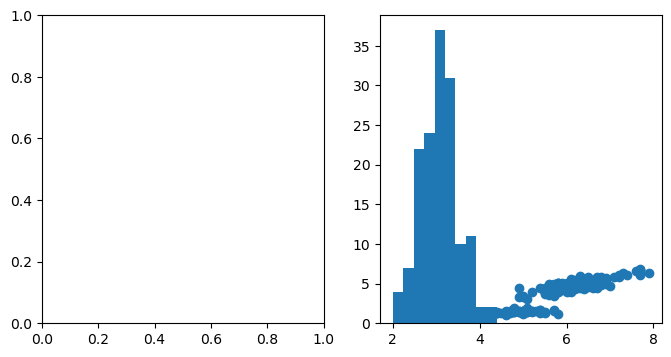

In [10]:
# Create a figure called fig with two axes, in a list called axs
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
# Plot a scatterplot of the sepal length x petal length
plt.scatter(df["sepal length (cm)"], df["petal length (cm)"])
# Plot a histogram of the sepal width
plt.hist(df["sepal width (cm)"]);

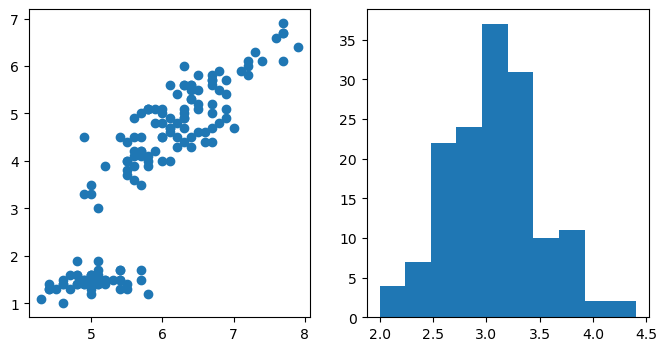

In [11]:
# Create a figure called fig with two axes, in a list called axs
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
# Plot a scatterplot of the sepal length x petal length on the first axis
axs[0].scatter(df["sepal length (cm)"], df["petal length (cm)"])
# Plot a histogram of the sepal width on the second axis
axs[1].hist(df["sepal width (cm)"]);

### Plotting individual series
Until now, we have always used the full data for our plots, but there might be a good reason to filter our data and plot different series using different options. For instance, what if we wanted to plot our flower species using an individual color for each instead of everything altogether?

Things can get a bit more complicated, or at least tedious. So let's start by plotting only **setosa** flowers.

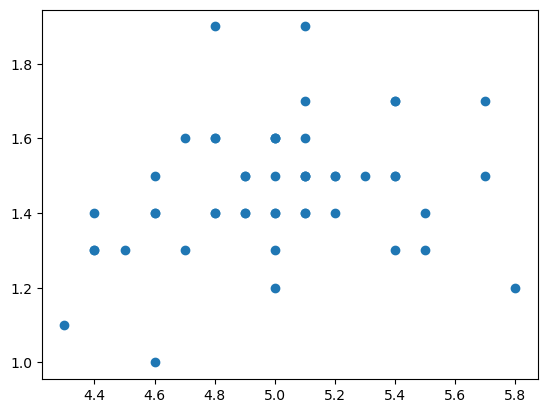

In [12]:
# Subset the dataframe to only a the setosa species
df_setosa = df.loc[df["species"] == "setosa"]
# Create a figure and axis
fig, ax = plt.subplots()
# Add the scatter plot ONLY for the setosa flowers
ax.scatter(df_setosa["sepal length (cm)"], df_setosa["petal length (cm)"])

The above plot is not really nice or useful, but now that we have seen how to plot a single iris species, we can use this to plot all species individually, using different colors.

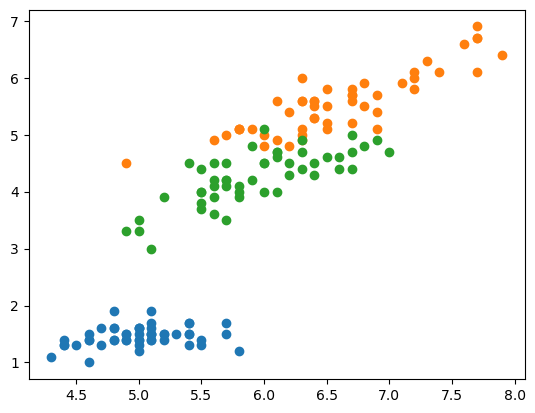

In [13]:
# Create three subsets of the data, one for each species
df_setosa = df.loc[df["species"] == "setosa"]
df_virginica = df.loc[df["species"] == "virginica"]
df_versicolor = df.loc[df["species"] == "versicolor"]

# Create a figure and axis
fig, ax = plt.subplots()
# Add the scatter plot ONLY for the setosa flowers
ax.scatter(df_setosa["sepal length (cm)"], df_setosa["petal length (cm)"])
# Add the scatter plot ONLY for the virginica flowers (notice, we use the same axis!)
ax.scatter(df_virginica["sepal length (cm)"], df_virginica["petal length (cm)"])
# Add the scatter plot ONLY for the versicolor flowers (again, we use the same axis!)
ax.scatter(df_versicolor["sepal length (cm)"], df_versicolor["petal length (cm)"])

Now we're slowly starting to see the advantage of plotting species individually. Let's recap a bit what happened above.

We plotted three different *series* on the same *axis*. Did you see how `matplotlib` automaticaly changed the color for each new series we added? This can be a bit confusing, because now, we're not sure which species is represented by which color! 

There are two ways we could clarify the above plot:  
+ We could specify the color individually for each iris species.
+ We could add a label for each series and display a legend on the plot.

Let's do both.

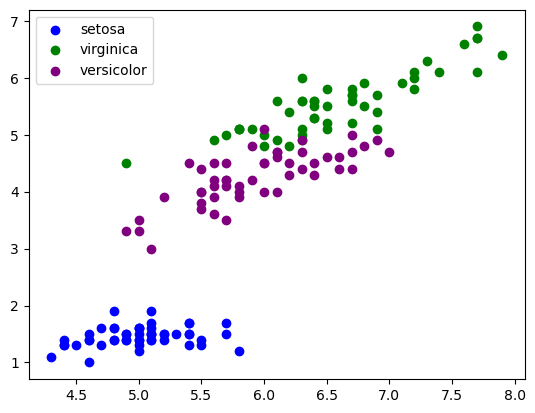

In [14]:
# The subsets are already defined from above, no need to repeat this part of the code!

# Create a figure and axis
fig, ax = plt.subplots()
# Add the scatter plot ONLY for the setosa flowers
ax.scatter(df_setosa["sepal length (cm)"], df_setosa["petal length (cm)"],
          color="blue", label="setosa")
# Add the scatter plot ONLY for the virginica flowers
ax.scatter(df_virginica["sepal length (cm)"], df_virginica["petal length (cm)"],
          color="green", label="virginica")
# Add the scatter plot ONLY for the versicolor flowers
ax.scatter(df_versicolor["sepal length (cm)"], df_versicolor["petal length (cm)"],
          color="purple", label="versicolor")
# We need to explictly add the legend to the axis
ax.legend()

Great! We now understand how to explicitly specify a color for the series we are plotting and how to add a legend such that the plot is easier to understand. However, there are still a few things missing.

___
#### 🤔 Pause and ponder
Looking at the plot above and forgetting everything about the code for the time being, can you think of information that is missing? As a data scientist, you always need to take the perspective of your audience, be it a client, boss, or the general public. 

Can anybody, who knows nothing about the code, understand what is going on in the plot above? If not, what is missing?

Your plots should **always** be self-explanatory (including title and description). If somebody has to ask something about a plot, it probably means the plot can be improved.
___

### Prettifying plots
Let's go ahead and take the perspective of our audience. What is unclear in the above plot?

+ Not everybody knows that *setosa*, *virginica*, and *versicolor* refer to iris species, it would be good to add a title to our legend.
+ It's unclear what the $x$- and $y$-axis represent, we absolutely need to label them.
+ A scatter plot is nice, but what if multiple flowers have the same sepal and petal length? We can't really see how many flowers each dot represent. Perhaps we could use a bit of transparency to make this more readable. This is done using a parameter called `alpha`, where `alpha=1` means no transparency at all, and `alpha=0` means completely transparent. You can think of `alpha` as the opacity percentage.
+ The plot is a bit small, it would be nice to make it larger.
+ A title indicating what the plot is about is always good.

Text(0.5, 1.0, 'Sepal and petal length for different iris species')

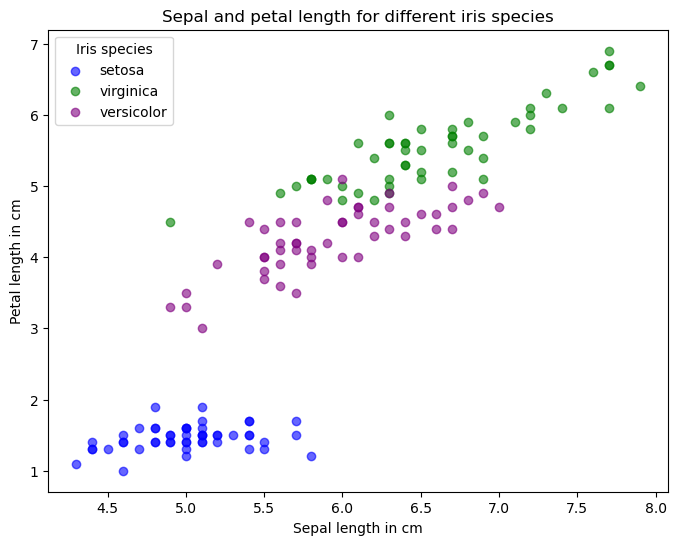

In [15]:
# Create a figure and axis, specify the figure size
fig, ax = plt.subplots(figsize=(8, 6))
# Add the scatter plot ONLY for the setosa flowers
ax.scatter(df_setosa["sepal length (cm)"], df_setosa["petal length (cm)"],
          color="blue", label="setosa", alpha=0.6)
# Add the scatter plot ONLY for the virginica flowers
ax.scatter(df_virginica["sepal length (cm)"], df_virginica["petal length (cm)"],
          color="green", label="virginica", alpha=0.6)
# Add the scatter plot ONLY for the versicolor flowers
ax.scatter(df_versicolor["sepal length (cm)"], df_versicolor["petal length (cm)"],
          color="purple", label="versicolor", alpha=0.6)
# Add the legend with an explicit title
ax.legend(title="Iris species")
# Add the x- and y-axes labels
ax.set_xlabel("Sepal length in cm")
ax.set_ylabel("Petal length in cm")
# Add a title to our plot
ax.set_title("Sepal and petal length for different iris species")

That's it. We have quite a nice plot which we could use in an analysis report or a presentation. Of course, as mentioned previously, `matplotlib` offers many more options which we can use to make this plot look even nicer. We will encounter a few of them in the class. For your project, it is a good idea to have a look at the [matplotlib gallery](https://matplotlib.org/stable/gallery/index.html) as it can provide useful inspiration for your own visualizations.

#### ➡️ ✏️ Your turn
Let's now add a second axis to our plot with a histogram of the sepal width. However, we want to add these histograms using the same colors, labels, and opacity levels that we did for the scatter plot. Go ahead and complete the code below to finalize the visualization.

Text(0.5, 1.0, 'Sepal width distribution for different iris species')

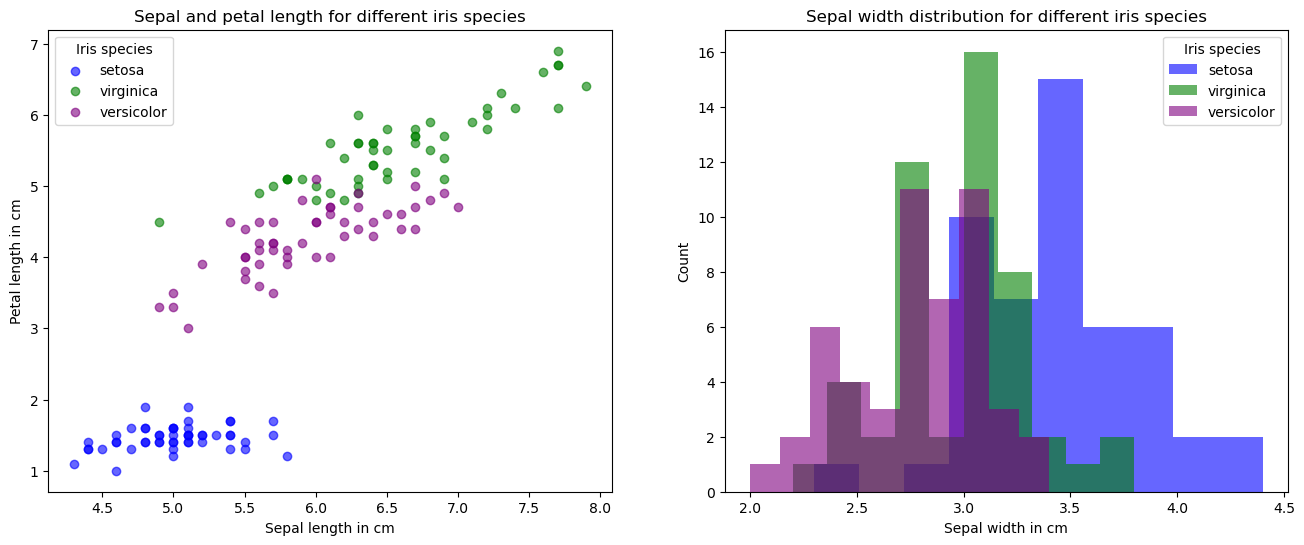

In [16]:
# Create a figure and axis, specify the figure size
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
# Add the scatter plot ONLY for the setosa flowers
axs[0].scatter(df_setosa["sepal length (cm)"], df_setosa["petal length (cm)"],
          color="blue", label="setosa", alpha=0.6)
axs[1].hist(df_setosa["sepal width (cm)"], color="blue", label="setosa", alpha=.6)
# Add the scatter plot ONLY for the virginica flowers
axs[0].scatter(df_virginica["sepal length (cm)"], df_virginica["petal length (cm)"],
          color="green", label="virginica", alpha=0.6)
axs[1].hist(df_virginica["sepal width (cm)"], color="green", label="virginica", alpha=.6)


# Add the scatter plot ONLY for the versicolor flowers
axs[0].scatter(df_versicolor["sepal length (cm)"], df_versicolor["petal length (cm)"],
          color="purple", label="versicolor", alpha=0.6)
axs[1].hist(df_versicolor["sepal width (cm)"], color="purple", label="versicolor", alpha=.6)


# Add the legend with an explicit title
axs[0].legend(title="Iris species")
axs[1].legend(title="Iris species")
# Add the x- and y-axes labels
axs[0].set_xlabel("Sepal length in cm")
axs[0].set_ylabel("Petal length in cm")
axs[1].set_xlabel("Sepal width in cm")
axs[1].set_ylabel("Count")
# Add a title to our plot
axs[0].set_title("Sepal and petal length for different iris species")
axs[1].set_title("Sepal width distribution for different iris species")


## Seaborn
---

Seaborn is a high-level plotting library built on top of `matplotlib`. It provides a more user-friendly interface for creating a wide range of visualizations, including scatter plots, histograms, bar charts, and more. Seaborn is designed to make it easier to create complex plots with minimal code, but it may lack some of the customization options that `matplotlib` offers.

Using seaborn, we can typically create similar plots to the ones we did above with a single line of code. The major difference is that seaborn plots can take a dataframe as input, allowing to specify which columns to plot using strings. For instance, the plot below is equivalent to the one we did above, specifying that the `sepal length` and `petal length` columns should be plotted on the $x$- and $y$-axes, with the `species` column used for color.

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

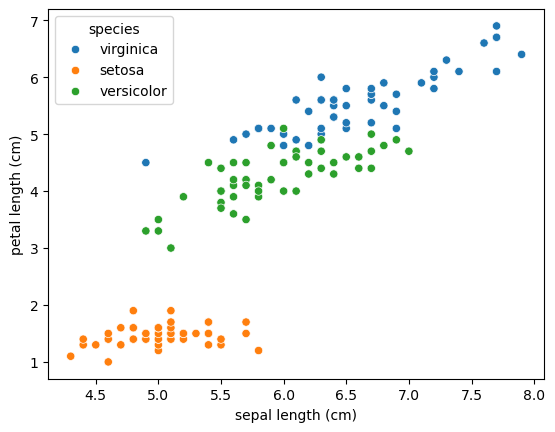

In [17]:
fig, ax = plt.subplots()

# We specify the dataframe, the columns to plot, the hue (color), and the axis to plot on
sns.scatterplot(data=df, x="sepal length (cm)", y="petal length (cm)", 
                hue="species", ax=ax)

#### ➡️ ✏️ Your turn
To conclude this notebook, try to replicate the plot we did above using seaborn. Make a scatter plot of the sepal length on the $x$-axis, and the petal length on the $y$-axis, with the species color-coded and add a histogram of the sepal width on the same plot (but on the right hand side of the plot).

*Hint*: Seaborn does not provide a `hist` function, you will have to search the documentation to find out how to create a histogram plot.

<Axes: xlabel='sepal width (cm)', ylabel='Count'>

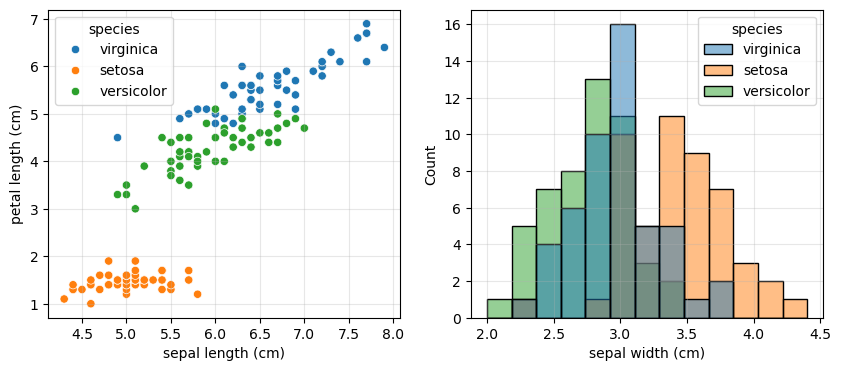

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
# Add a grid (with opacity 30%) to each graph
for ax in axs:
    ax.grid(alpha=.3)
sns.scatterplot(data=df, x="sepal length (cm)", y="petal length (cm)", hue="species", ax=axs[0])
sns.histplot(data=df, x="sepal width (cm)", hue="species", ax=axs[1])